In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras. preprocessing.sequence import pad_sequences
print(tf.__version__)

from sklearn.model_selection import train_test_split

2.4.1


In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import collections

In [9]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

print(train.head())
print(test.head())

   id                                        raw_address  \
0   0  jl kapuk timur delta sili iii lippo cika 11 a ...   
1   1                                 aye, jati sampurna   
2   2               setu siung 119 rt 5 1 13880 cipayung   
3   3                               toko dita, kertosono   
4   4                                      jl. orde baru   

                                  POI/street  
0  /jl kapuk timur delta sili iii lippo cika  
1                                          /  
2                                     /siung  
3                                 toko dita/  
4                             /jl. orde baru  
   id                                    raw_address
0   0          s. par 53 sidanegara 4 cilacap tengah
1   1          angg per, baloi indah kel. lubuk baja
2   2                          asma laun, mand imog,
3   3  ud agung rej, raya nga sri wedari karanganyar
4   4                     cut mutia, 35 baiturrahman


In [4]:
print(train['raw_address'].sample(20))

51638     jalan gatot subroto,perumahan gerbang kencana(...
217174                    smp negeri 1 pringg, h agus salim
194349                dwic medika uta cv let sla riy, no 36
158711       kharismapratama abadisejatindo pt mes, sunggal
266361    mas jami habib ali, raya garo parakan garokgek...
22752               jl stasiun ngadiluwih no 17 rt rw 01 01
89879         bango, 38 rt 5 rw 8 pondok labu kel. cilandak
141161    sudiang raya bumi perm sudi 19 90242 biring ka...
138763                        sd neger sma, parta panongan,
282208                         gang ban rinding teluk bayur
276820                           warung nasi ega, tero raya
94149                   eagle files, man besar 8 taman sari
185545                                     jaka collection,
278511                kwala begumit ten amir ham, 111 20811
56728                                 tamanan gura 11 55191
20139                               sd neg purwosari, 54365
196530                    kebon baru gg.

In [5]:
# creating regex to split raw_address into words
my_regex = '\s|,\s|,|\.|:'

# POI

## Splitting Data - POI

In [6]:
raw_df_withPOI = train[train['POI/street'].str.contains('.+(?=/)')==True]
raw_df_withPOI['POI/street'] = raw_df_withPOI['POI/street'].str.extract(r'(.+)(?=/)')
raw_df_withPOI.head()

<ipython-input-6-b6388c6d3dde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_withPOI['POI/street'] = raw_df_withPOI['POI/street'].str.extract(r'(.+)(?=/)')


,id,raw_address,POI/street
3,3,"toko dita, kertosono",toko dita
5,5,"raya samb gede, 299 toko bb kids",toko bb kids
10,10,"cikahuripan sd neg boj 02 klap boj, no 5 16877",sd negeri bojong 02
11,11,"yaya atohar,",yayasan atohariyah
15,15,"kampung.gudang areng,desa:anyer, kecamatan:any...",gudang areng


In [7]:
# turning raw_address and POI/street columns into lists of strings; discarding id and index column
list_of_addresses_withPOI = [*raw_df_withPOI['raw_address']]
print(list_of_addresses_withPOI[:5])

list_of_POI = [*raw_df_withPOI['POI/street']]

['toko dita, kertosono', 'raya samb gede, 299 toko bb kids', 'cikahuripan sd neg boj 02 klap boj, no 5 16877', 'yaya atohar,', 'kampung.gudang areng,desa:anyer, kecamatan:anyar, kabupaten: serang, belakang bca anyar']


## Creating labels_binary_POI

[3, 7, 10, 2, 12]
30
121491


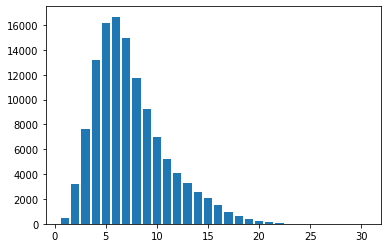

[2, 3, 4, 2, 2]
23
121491


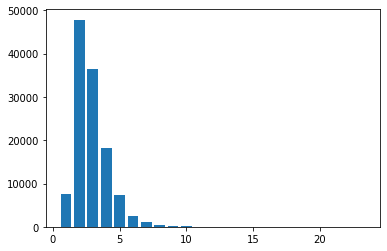

In [17]:
# plotting distribution of length of raw_addresses and POI
from Plot_distribution import plotDistribution

plotDistribution(list_of_addresses_withPOI)
plotDistribution(list_of_POI)

In [ ]:
max_length_address = 25   #len(max(raw_df_withPOI['raw_address']))
max_length_POI = 10       #len(max(raw_df_withPOI['POI/street']))

In [ ]:
dictionary_POI = {}

In [ ]:
# binary labels for all addresses in test.csv
from Binary_labels_and_dict import binary_labels_and_dict

labels_binary_POI, dictionary_POI = binary_labels_and_dict(list_of_addresses_withPOI, list_of_POI, dictionary_POI)

In [ ]:
print(len(dictionary_POI))

# filter out words that contain only digits or have 0 characters from dictionary
from Binary_labels_and_dict import filter_dict

filtered_dict_POI = filter_dict(dictionary_POI)
print(len(filtered_dict_POI))

## Tokenizer and Padding - POI

In [ ]:
trunc_type = 'post'
padding = 'post'
oov_tok="<OOV>"

print(type(list_of_addresses_withPOI))
sentences_to_tokenize = list_of_addresses_withPOI.copy()

print(type(sentences_to_tokenize))

print(len(list_of_addresses_withPOI))

sentences_to_tokenize.append(list_of_POI)
print(len(list_of_addresses_withPOI))
print(sentences_to_tokenize[:5])

In [16]:
if len(list_of_addresses_withPOI) != len(list_of_POI):
  print(len(list_of_addresses_withPOI))
  print(len(list_of_POI))

In [ ]:
# Tokenizing train_addresses and train_POI
from Tokenize_and_pad import tokenize_and_pad

# Tokenizing train_addresses & train_POI and Padding addresses
padded, word_index = tokenize_and_pad(sentences_to_tokenize, list_of_addresses_withPOI)
print(padded[0])
print(padded.shape)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(list_of_addresses_withPOI[1])

## Train Test Split - POI

In [ ]:
# train_test_split to get training and testing datasets
train_addresses_withPOI, test_addresses_withPOI, train_labels_POI, test_labels_POI = train_test_split(
padded, labels_binary_POI, test_size=0.20, random_state=42)

## Model building - POI

In [ ]:
embedding_dim = 64

# basic model - no Bidirectional, LSTM, etc.
model_POI = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, embedding_dim, input_length=max_length_address),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(max_length_address, activation='sigmoid')
])
model_POI.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_POI.summary()

In [ ]:
# if train_padded.shape[0] != labels_binary_POI.shape[0]:
#   print('Training addresses and labels have different number of rows')

In [ ]:
earlyStopping = EarlyStopping(monitor = 'val_acc', patience = 5)
modelCheckpoint = ModelCheckpoint('best_model.hdf5', save_best_only = True)

num_epochs = 3

history = model_POI.fit(train_addresses_withPOI, train_labels_POI, epochs=num_epochs, validation_data=(test_addresses_withPOI, test_labels_POI), callbacks=[earlyStopping, modelCheckpoint])

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## model_POI.predict

In [ ]:
print(type(test))
live_padded = tokenize_and_pad(test['raw_address'])
print(live_padded.shape)

from Predict_and_convert_to_words import predict_and_convert_to_words

live_labels_POI = predict_and_convert_to_words(live_padded, test['raw_address'], threshold=0.5, filtered_dict_POI, model_POI)
print(live_labels_POI[:5])
print(test['raw_address'][:5])

# Street (ST)

## Splitting Data - ST

In [12]:
raw_df_withST = train[train['POI/street'].str.contains('(?<=/).+')==True]
raw_df_withST['POI/street'] = raw_df_withST['POI/street'].str.extract(r'(?<=/)(.+)')
raw_df_withST.head()

<ipython-input-12-e80007895fc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_withST['POI/street'] = raw_df_withST['POI/street'].str.extract(r'(?<=/)(.+)')


,id,raw_address,POI/street
0,0,jl kapuk timur delta sili iii lippo cika 11 a ...,jl kapuk timur delta sili iii lippo cika
2,2,setu siung 119 rt 5 1 13880 cipayung,siung
4,4,jl. orde baru,jl. orde baru
5,5,"raya samb gede, 299 toko bb kids",raya samb gede
6,6,"kem mel raya, no 4 bojong rawalumbu rt 1 36 ra...",kem mel raya


In [13]:
# turning raw_address and POI/street columns into lists of strings; discarding id and index column
list_of_addresses_withST = [*raw_df_withST['raw_address']]
print(list_of_addresses_withST[:5])

list_of_ST = [*raw_df_withST['POI/street']]

['jl kapuk timur delta sili iii lippo cika 11 a cicau cikarang pusat', 'setu siung 119 rt 5 1 13880 cipayung', 'jl. orde baru', 'raya samb gede, 299 toko bb kids', 'kem mel raya, no 4 bojong rawalumbu rt 1 36 rawalumbu']


## Creating labels_binary_ST

[13, 8, 4, 7, 11]
30


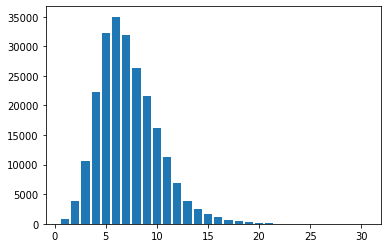

[8, 1, 4, 3, 3]
17


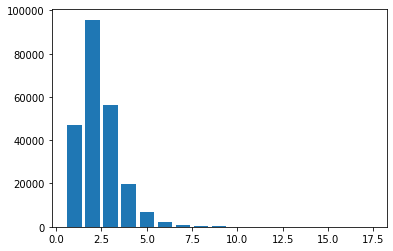

[13, 8, 4, 7, 11]
30
229857


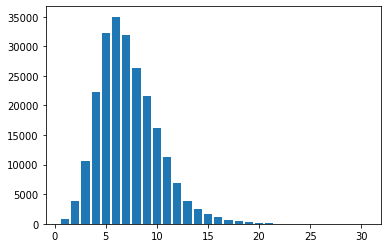

In [14]:
# plotting distribution of length of raw_addresses and ST
plotDistribution(list_of_addresses_withST)
plotDistribution(list_of_ST)

In [ ]:
max_length_address = 25   #len(max(raw_df_withST['raw_address']))
max_length_ST = 10       #len(max(raw_df_withST['POI/street']))

In [ ]:
dictionary_ST = {}

In [ ]:
# binary labels for training set
labels_binary_ST, dictionary_ST = binary_labels_and_dict(list_of_addresses_withST, list_of_ST, dictionary_ST)

In [ ]:
print(len(dictionary_ST))

filtered_dict_ST = filter_dict(dictionary_ST)
print(len(filtered_dict_ST))

## Tokenizer and Padding - ST

In [ ]:
trunc_type = 'post'
padding = 'post'
oov_tok="<OOV>"

print(type(list_of_addresses_withST))
sentences_to_tokenize = list_of_addresses_withST.copy()

print(type(sentences_to_tokenize))
# train_ST_sentences = []

print(len(list_of_addresses_withST))

sentences_to_tokenize.append(list_of_ST)
print(len(list_of_addresses_withST))
print(sentences_to_tokenize[:5])

In [ ]:
if len(list_of_addresses_withST) != len(list_of_ST):
  print(len(list_of_addresses_withPOI))
  print(len(list_of_POI))

In [ ]:
#Tokenizing train_addresses and train_ST & Padding train_addresses, train_ST, test_addresses
padded, word_index = tokenize_and_pad(sentences_to_tokenize, list_of_addresses_withST)
print(padded[0])
print(padded.shape)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_padded[1]))
print(list_of_addresses_withST[1])

## Train Test Split - ST

In [ ]:
# train_test_split to get training and testing datasets
train_addresses_withST, test_addresses_withST, train_labels_ST, test_labels_ST = train_test_split(
padded, labels_binary_ST, test_size=0.20, random_state=42)

print(len(train_addresses_withST))
print(len(train_labels_ST))

## Model building - ST

In [ ]:
embedding_dim = 64

# basic model - no Bidirectional, LSTM, etc.
model_ST = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, embedding_dim, input_length=max_length_address),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(max_length_address, activation='sigmoid')
])
model_ST.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_ST.summary()

In [ ]:
if train_padded.shape[0] != labels_binary_ST.shape[0]:
  print('Training addresses and labels have different number of rows')

In [ ]:
num_epochs = 10

history = model_ST.fit(train_addresses_withST, train_labels_ST, epochs=num_epochs, validation_data=(test_addresses_withST, test_labels_ST), callbacks=[earlyStopping, modelCheckpoint])

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## model_ST.predict

In [ ]:
live_padded_ST = tokenize_and_pad(test['raw_address'])
print(live_padded_ST.shape)

In [ ]:
live_labels_ST = predict_and_convert_to_words(live_padded_ST, test['raw_address'], threshold=0.5, filtered_dict_ST, model_ST)
print(live_labels_ST[:5])
print(test['raw_address'][:5])

# Combine results of POI and ST - POI/Street column

In [ ]:
print('live_labels_ST is type: ' + str(type(live_labels_ST)))
print('live_labels_POI is type: ' + str(type(live_labels_POI)))

# check if live_labels_ST and _POI have same number of elements
if len(live_labels_ST) != len(live_labels_POI):
  print('live_labels_ST and _POI have different number of elements')

In [ ]:
test['POI'] = live_labels_POI
test['Street'] = live_labels_ST

print(test.head())

test['POI/Street'] = test.POI.cat(test.Street, sep='/')
print(test.head())

submission = test[['id', 'POI/Street']]
print(submission)

submission.to_csv('submission.csv', index=False)